## Drugs Classification

Ce projet s'inscrit dans le cadre de notre cours de Machine Learning. Les donnees utilisees nous viennent de l'agence europeenne des medicaments. Elles comportent les colonnes suivantes:

- category : catégorie du medicament humain ou veterinaire 
- medicine_name : nom de marque du médicament du médicament
- therapeutic_area : les domaines thérapeutiques du medicament
- common_name : dénomination commune Internationale du medicament
- active_substance : substance active du médicament
- product_number : numéro identifiant du medicament: EMEA/H/C/ (pour humain) ou EMEA/V/C/ (pour vétérinaire) du médicament

- patient_safety : sécurité du patient vis-à-vis du médicament 
- authorisation_status : statut d'autorisation du médicament, si le médicament a été autorisé, retiré, ou refusé (ou n'a pas de statut rapporté)

- atc_code : code ATC (Anatomical Therapeutic Chemical)
- additional_monitoring : surveillance supplémentaire
- generic : médicament générique
- biosimilar : médicament biosimilaire
- conditional_approval : autorisation conditionnelle
- exceptional_circumstances : circonstances exceptionnelles
- accelerated_assessment : évaluation accélérée
- orphan_medicine : médicament orphelin
- marketing_authorisation_date : date d'autorisation de mise sur le marché
- date_of_refusal_of_marketing_authorisation : date de refus d'autorisation de mise sur le marché
- marketing_authorisation_holder_company_name : nom de la société autorisée à commercialiser le médicament
- pharmacotherapeutic_group : groupe pharmacothérapeutique
- date_of_opinion : date de l'avis
- decision_date : date de la décision la plus récente
- revision_number : numéro de révision
- condition_indication : indication de la condition
- species : espèce (pour les médicaments vétérinaires)
- first_published : date de la première publication
- revision_date : date de la révision la plus récente
- url : URL pour plus de détails sur le médicament et la soumission


Ce projet a pour but:


- de faire dans un premier temps une classification supervisee sur la variable authorisation_status, qui definit si un medicament donne est autorise a la vente ou non
- de faire un modele d'apprentissage non supervisé sur les différents groupes que la tache precedente a permis de faire



### 1.Lecture des données 

In [32]:
import pandas as pd

datas = pd.read_csv('../Datas/drugs.csv', sep=",")

In [33]:
datas

category medicine_name  \
0       human      Adcetris   
1       human         Nityr   
2       human       Ebvallo   
3       human     Ronapreve   
4       human      Cosentyx   
...       ...           ...   
1983    human      Liprolog   
1984    human       EchoGen   
1985    human     Ecokinase   
1986    human      Primavax   
1987    human   Pylori-Chek   

                                       therapeutic_area  \
0               Lymphoma, Non-Hodgkin;  Hodgkin Disease   
1                                          Tyrosinemias   
2                         Lymphoproliferative Disorders   
3                              COVID-19 virus infection   
4     Arthritis, Psoriatic;  Psoriasis;  Spondylitis...   
...                                                 ...   
1983                                  Diabetes Mellitus   
1984                                   Echocardiography   
1985                              Myocardial Infarction   
1986  Hepatitis B;  Tetanus;  Immunization;  Diphtheria   
1987             Breath Tests;  Helicobacter Infections   

                                            common_name  \
0                                   brentuximab vedotin   
1                                            nitisinone   
2                                         tabelecleucel   
3                                casirivimab, imdevimab   
4                                           secukinumab   
...                                                 ...   
1983                                     insulin lispro   
1984                                dodecafluoropentane   
1985                                          reteplase   
1986  diphtheria, tetanus and hepatitis b (rdna) vac...   
1987                                           13c-urea   

                                       active_substance  product_number  \
0                                   brentuximab vedotin            2455   
1                                            nitisinone            4582   
2                                         tabelecleucel            4577   
3                                casirivimab, imdevimab            5814   
4                                           secukinumab            3729   
...                                                 ...             ...   
1983                                     insulin lispro             143   
1984                                dodecafluoropentane             149   
1985                                          reteplase             106   
1986  diphtheria toxoid, hepatitis b, recombinant su...             156   
1987                                         urea (13c)             182   

      patient_safety authorisation_status atc_code  additional_monitoring  \
0              False           authorised  L01XC12                  False   
1              False           authorised  A16AX04                  False   
2              False           authorised      NaN                   True   
3              False           authorised    J06BD                   True   
4              False           authorised  L04AC10                  False   
...              ...                  ...      ...                    ...   
1983           False            withdrawn  A10AB04                  False   
1984           False            withdrawn    V08DA                  False   
1985           False            withdrawn  B01AD07                  False   
1986           False            withdrawn    J07CA                  False   
1987           False            withdrawn    V04CX                  False   

      ...  marketing_authorisation_holder_company_name  \
0     ...                            Takeda Pharma A/S   
1     ...           Cycle Pharmaceuticals (Europe) Ltd   
2     ...                      Pierre Fabre Medicament   
3     ...                     Roche Registration GmbH    
4     ...                   Novartis Europharm Limited   
...   ...                               

In [34]:
datas.describe()

product_number  revision_number
count     1988.000000      1892.000000
mean      2634.774145        13.527484
std       1915.734686        11.647056
min         24.000000         0.000000
25%        715.750000         4.750000
50%       2544.500000        11.000000
75%       4351.000000        19.000000
max       6039.000000        89.000000

In [35]:
datas.head()

category medicine_name                                   therapeutic_area  \
0    human      Adcetris            Lymphoma, Non-Hodgkin;  Hodgkin Disease   
1    human         Nityr                                       Tyrosinemias   
2    human       Ebvallo                      Lymphoproliferative Disorders   
3    human     Ronapreve                           COVID-19 virus infection   
4    human      Cosentyx  Arthritis, Psoriatic;  Psoriasis;  Spondylitis...   

              common_name        active_substance  product_number  \
0     brentuximab vedotin     brentuximab vedotin            2455   
1              nitisinone              nitisinone            4582   
2           tabelecleucel           tabelecleucel            4577   
3  casirivimab, imdevimab  casirivimab, imdevimab            5814   
4             secukinumab             secukinumab            3729   

   patient_safety authorisation_status atc_code  additional_monitoring  ...  \
0           False           authorised  L01XC12                  False  ...   
1           False           authorised  A16AX04                  False  ...   
2           False           authorised      NaN                   True  ...   
3           False           authorised    J06BD                   True  ...   
4           False           authorised  L04AC10                  False  ...   

   marketing_authorisation_holder_company_name  \
0                            Takeda Pharma A/S   
1           Cycle Pharmaceuticals (Europe) Ltd   
2                      Pierre Fabre Medicament   
3                     Roche Registration GmbH    
4                   Novartis Europharm Limited   

                         pharmacotherapeutic_group  date_of_opinion  \
0                            Antineoplastic agents       2012-07-19   
1  Other alimentary tract and metabolism products,       2018-05-31   
2                                              NaN       2022-10-13   
3                 Immune sera and immunoglobulins,       2021-11-11   
4                               Immunosuppressants       2014-11-20   

   decision_date  revision_number  \
0     2022-11-17             34.0   
1     2023-03-10              4.0   
2     2023-03-09              2.0   
3     2023-02-24              3.0   
4     2023-01-26             30.0   

                                condition_indication species  \
0  Hodgkin lymphomaAdcetris is indicated for adul...     NaN   
1  Treatment of adult and paediatric patients wit...     NaN   
2  Ebvallo is indicated as monotherapy for treatm...     NaN   
3  Ronapreve is indicated for:Treatment of COVID-...     NaN   
4  Plaque psoriasisCosentyx is indicated for the ...     NaN   

        first_published         revision_date  \
0  2018-07-25T13:58:00Z  2023-03-13T11:52:00Z   
1  2018-07-26T14:20:00Z  2023-03-10T17:29:00Z   
2  2022-10-12T16:13:00Z  2023-03-10T13:40:00Z   
3  2021-11-12T16:30:00Z  2023-03-10T12:29:00Z   
4  2018-06-07T11:59:00Z  2023-03-09T18:53:00Z   

                                                 url  
0  https://www.ema.europa.eu/en/medicines/human/E...  
1  https://www.ema.europa.eu/en/medicines/human/E...  
2  https://www.ema.europa.eu/en/medicines/human/E...  
3  https://www.ema.europa.eu/en/medicines/human/E...  
4  https://www.ema.europa.eu/en/medicines/human/E...  

[5 rows x 28 columns]

In [36]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


### 2. Typologie des variables

#### a. Variables quantitatives

numerical_columns = datas.select_dtypes(include=['number']).columns
print(numerical_columns)

Les variables **product_number** et **revision_number** sont considérées comme quantitatives. Cependant avec une comprehension du dataset, ces variables sont plutot qualitatives même s'elles sont représentées par des nombres. 

#### b. Variables qualitatives

In [7]:
numerical_columns = datas.select_dtypes(include=['object']).columns
print(numerical_columns)

Index(['category', 'medicine_name', 'therapeutic_area', 'common_name',
       'active_substance', 'authorisation_status', 'atc_code',
       'marketing_authorisation_date',
       'date_of_refusal_of_marketing_authorisation',
       'marketing_authorisation_holder_company_name',
       'pharmacotherapeutic_group', 'date_of_opinion', 'decision_date',
       'condition_indication', 'species', 'first_published', 'revision_date',
       'url'],
      dtype='object')


Donc nous pouvons considerer l' ensemble de notre dataset comme etant des variables qualitatives

### 2.Valeurs manquantes dans les colonnes

#### a.Decompte des valeurs manquantes

In [40]:
datas.isnull().sum()

category                                          0
medicine_name                                     0
therapeutic_area                                285
common_name                                       4
active_substance                                  1
product_number                                    0
patient_safety                                    0
authorisation_status                              1
atc_code                                         28
additional_monitoring                             0
generic                                           0
biosimilar                                        0
conditional_approval                              0
exceptional_circumstances                         0
accelerated_assessment                            0
orphan_medicine                                   0
marketing_authorisation_date                     60
date_of_refusal_of_marketing_authorisation     1913
marketing_authorisation_holder_company_name       4
pharmacother

#### b.Visuaisation des données manquantes

In [41]:
import missingno as msno

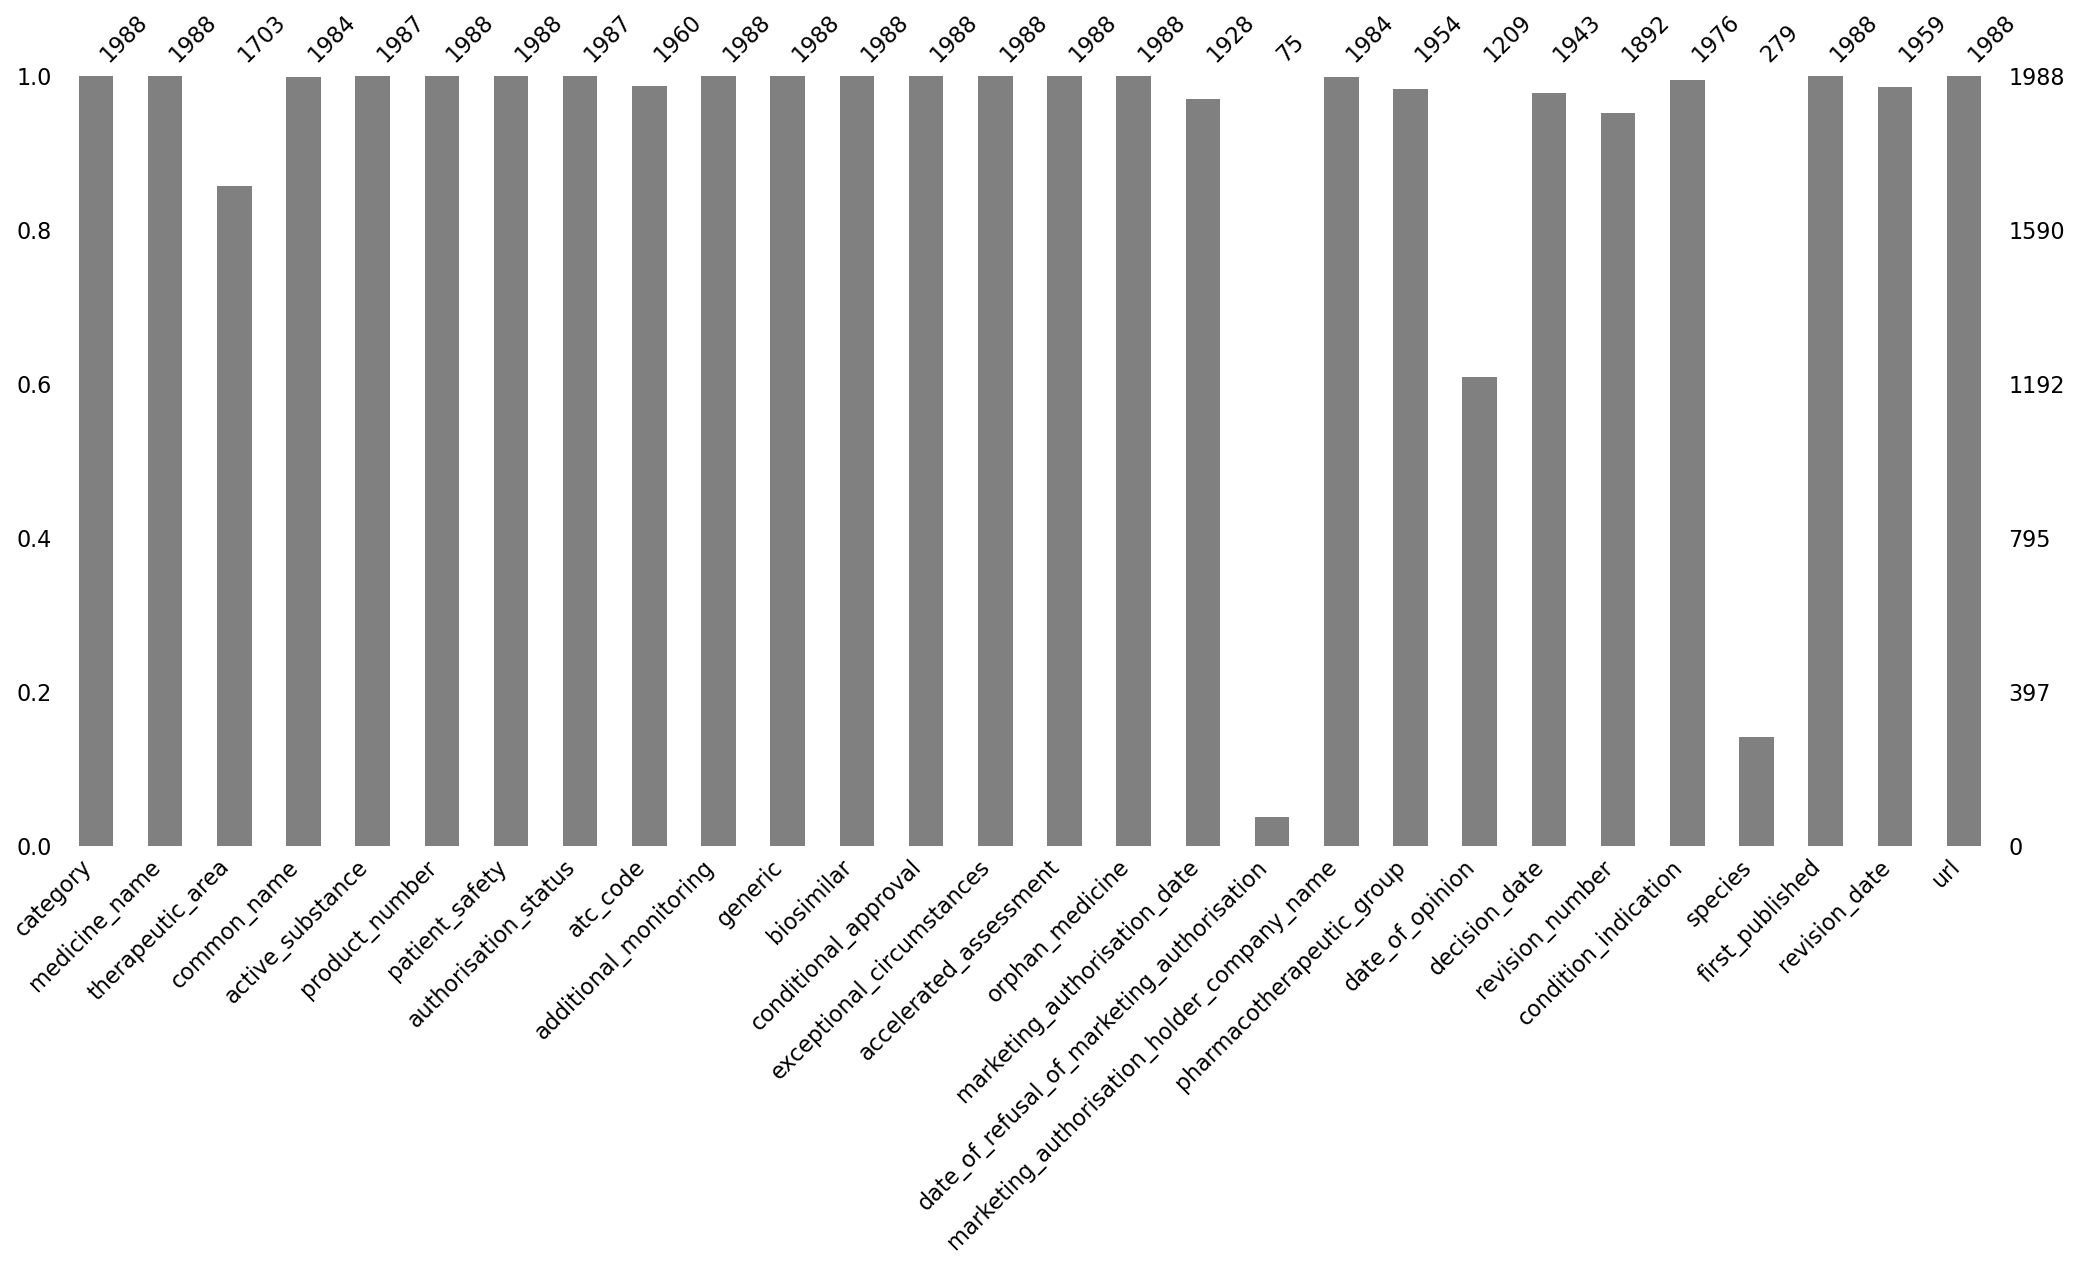

In [42]:
msno.bar(datas,
         filter="top",
         color="gray"
        );

**Pour les valeurs manquantes**, on voit qu'il y'a que plusieurs colonnes en ont. Cependant il y'a quatre (04) colonnes qui ont plus de valeurs manquantes que les autres. Ce sont les colonnes:
- therapeutic_area: avec 1703 valeurs renseignées sur 1988,
- date_of_refusal_of_marketing_authorisation: avec 75 valeurs renseignées sur 1988
- date_of_opinion: avec 1209 renseignees sur les 1988
- species avec seulement 279 valeurs renseignées sur les 1988

#### c.Selection de colonnes

In [24]:
valeurs_uniques = datas.nunique()
valeurs_uniques

category                                          2
medicine_name                                  1976
therapeutic_area                                669
common_name                                    1261
active_substance                               1345
product_number                                 1932
patient_safety                                    2
authorisation_status                              3
atc_code                                       1074
additional_monitoring                             2
generic                                           2
biosimilar                                        2
conditional_approval                              2
exceptional_circumstances                         2
accelerated_assessment                            2
orphan_medicine                                   2
marketing_authorisation_date                   1127
date_of_refusal_of_marketing_authorisation       67
marketing_authorisation_holder_company_name     615
pharmacother

Nous constatons que beaucoup de colonnes à variables qualitatives comportent plus de 1000 catgories sur les 1988. Ainsi en combinant, les colonnes à valeurs manquantes et certaines de ces colonnes, nous avons décidé de supprimer les colonnes et ainsi réduire la dimension de notre dataset.
Les colonnes à plus de 1000 categories qui ne sont pas supprimé sont:
- medecine_name: pour le nom du medicament
- active_substance: pour la substance active dans le medicament
- common_name: le nom courant du medicament

In [43]:
new_datas = datas.drop(['marketing_authorisation_date', 'product_number', 'decision_date', 'date_of_opinion', 'first_published', 'atc_code', 'condition_indication','product_number','url', 'revision_date','species', 'date_of_refusal_of_marketing_authorisation'], axis=1)

On obtient un nouveau dataset avec 17 colonnes

In [44]:
new_datas

category medicine_name  \
0       human      Adcetris   
1       human         Nityr   
2       human       Ebvallo   
3       human     Ronapreve   
4       human      Cosentyx   
...       ...           ...   
1983    human      Liprolog   
1984    human       EchoGen   
1985    human     Ecokinase   
1986    human      Primavax   
1987    human   Pylori-Chek   

                                       therapeutic_area  \
0               Lymphoma, Non-Hodgkin;  Hodgkin Disease   
1                                          Tyrosinemias   
2                         Lymphoproliferative Disorders   
3                              COVID-19 virus infection   
4     Arthritis, Psoriatic;  Psoriasis;  Spondylitis...   
...                                                 ...   
1983                                  Diabetes Mellitus   
1984                                   Echocardiography   
1985                              Myocardial Infarction   
1986  Hepatitis B;  Tetanus;  Immunization;  Diphtheria   
1987             Breath Tests;  Helicobacter Infections   

                                            common_name  \
0                                   brentuximab vedotin   
1                                            nitisinone   
2                                         tabelecleucel   
3                                casirivimab, imdevimab   
4                                           secukinumab   
...                                                 ...   
1983                                     insulin lispro   
1984                                dodecafluoropentane   
1985                                          reteplase   
1986  diphtheria, tetanus and hepatitis b (rdna) vac...   
1987                                           13c-urea   

                                       active_substance  patient_safety  \
0                                   brentuximab vedotin           False   
1                                            nitisinone           False   
2                                         tabelecleucel           False   
3                                casirivimab, imdevimab           False   
4                                           secukinumab           False   
...                                                 ...             ...   
1983                                     insulin lispro           False   
1984                                dodecafluoropentane           False   
1985                                          reteplase           False   
1986  diphtheria toxoid, hepatitis b, recombinant su...           False   
1987                                         urea (13c)           False   

     authorisation_status  additional_monitoring  generic  biosimilar  \
0              authorised                  False    False       False   
1              authorised                  False     True       False   
2              authorised                   True    False       False   
3              authorised                   True    False       False   
4              authorised                  False    False       False   
...                   ...                    ...      ...         ...   
1983            withdrawn                  False    False       False   
1984            withdrawn                  False    False       False   
1985            withdrawn                  False    False       False   
1986            withdrawn                  False    False       False   
1987            withdrawn                  False    False       False   

      conditional_approval  exceptional_circumstances  accelerated_assessment  \
0                    False                      False                   False   
1                    False                      False                   False   
2                    False                       True                   False   
3                    False                      False                   False   
4                    False     

### Exploration des variables

#### a.Variable cible: authorisation_status

In [11]:
target = datas['authorisation_status']
target

0       authorised
1       authorised
2       authorised
3       authorised
4       authorised
           ...    
1983     withdrawn
1984     withdrawn
1985     withdrawn
1986     withdrawn
1987     withdrawn
Name: authorisation_status, Length: 1988, dtype: object

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution de la variable cible')

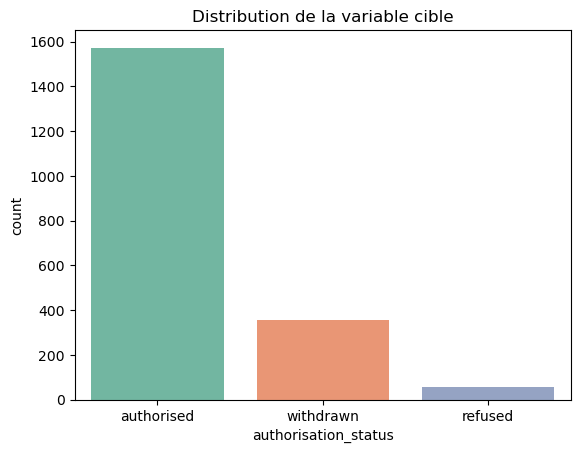

In [14]:
sns.countplot(x=target, data=datas, palette="Set2")
plt.title("Distribution de la variable cible")

**Conclusion**: on voit que la variable cible a trois(03) categories: `autorised`, `withdrawn` et `refused`. Nous notons un certain desequilibre entre les differentes catégories 

#### b.Distribution des autres variables

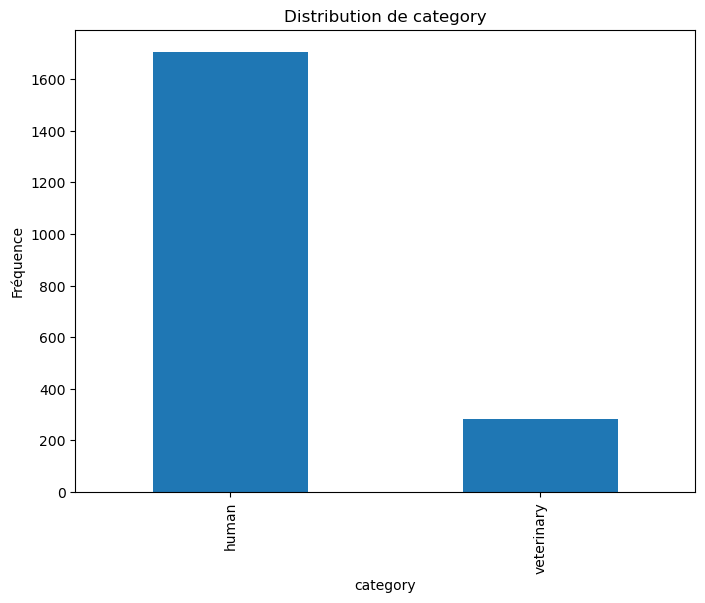

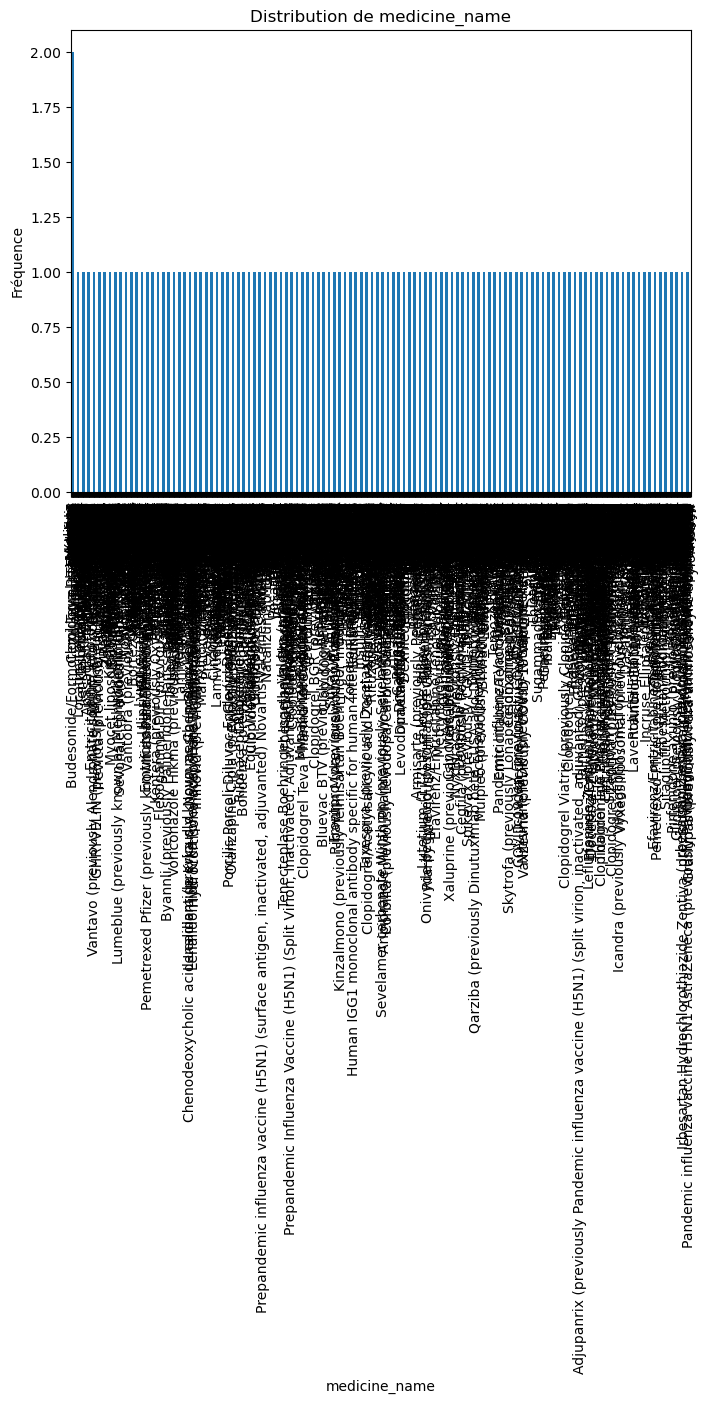

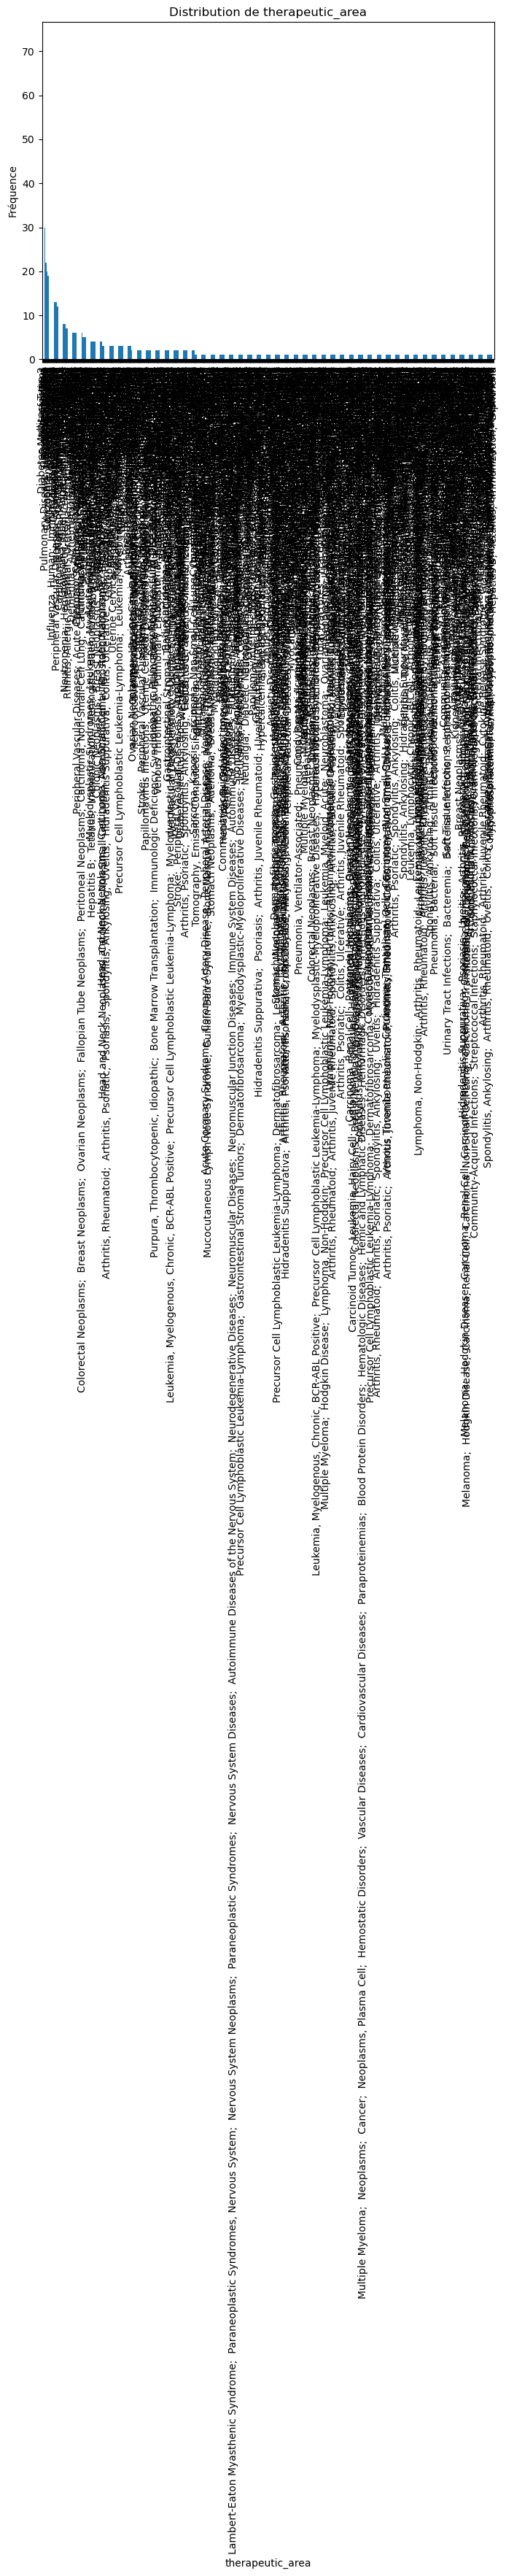

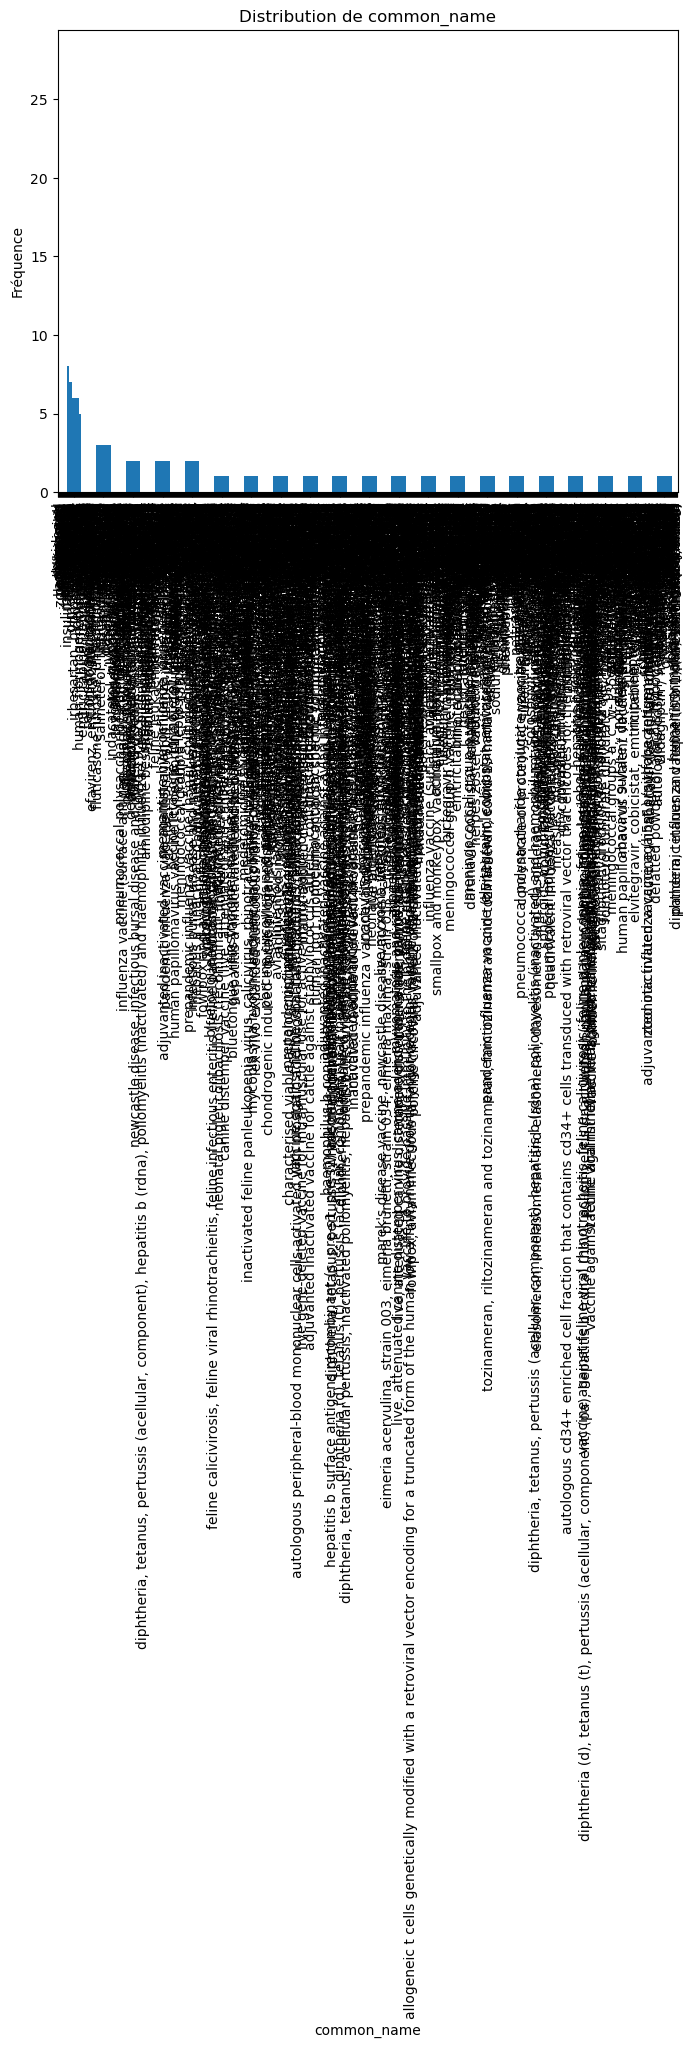

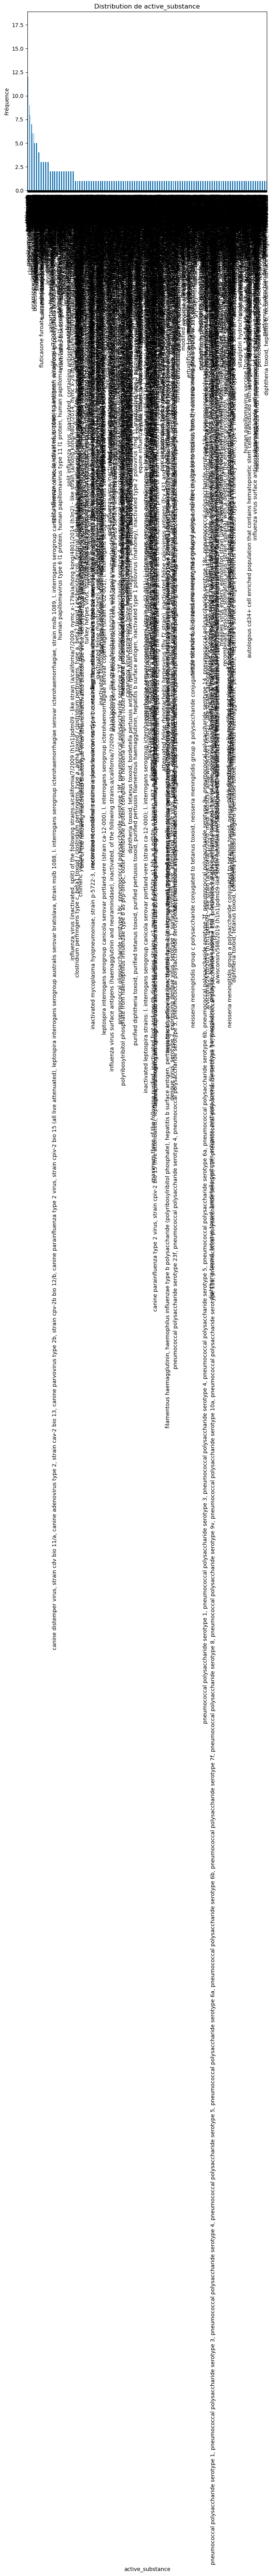

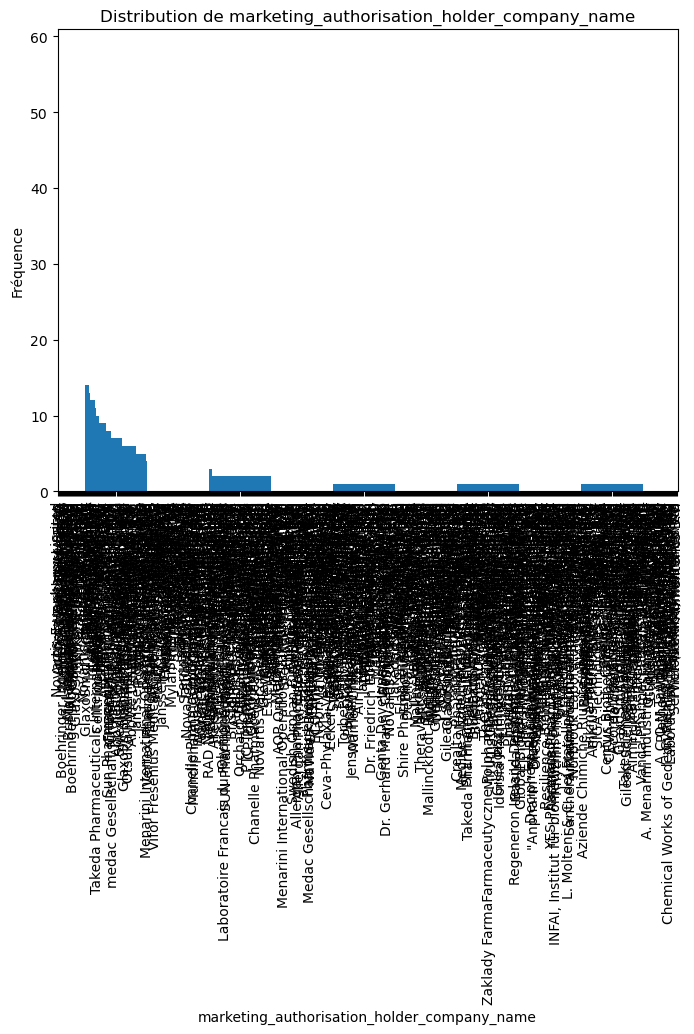

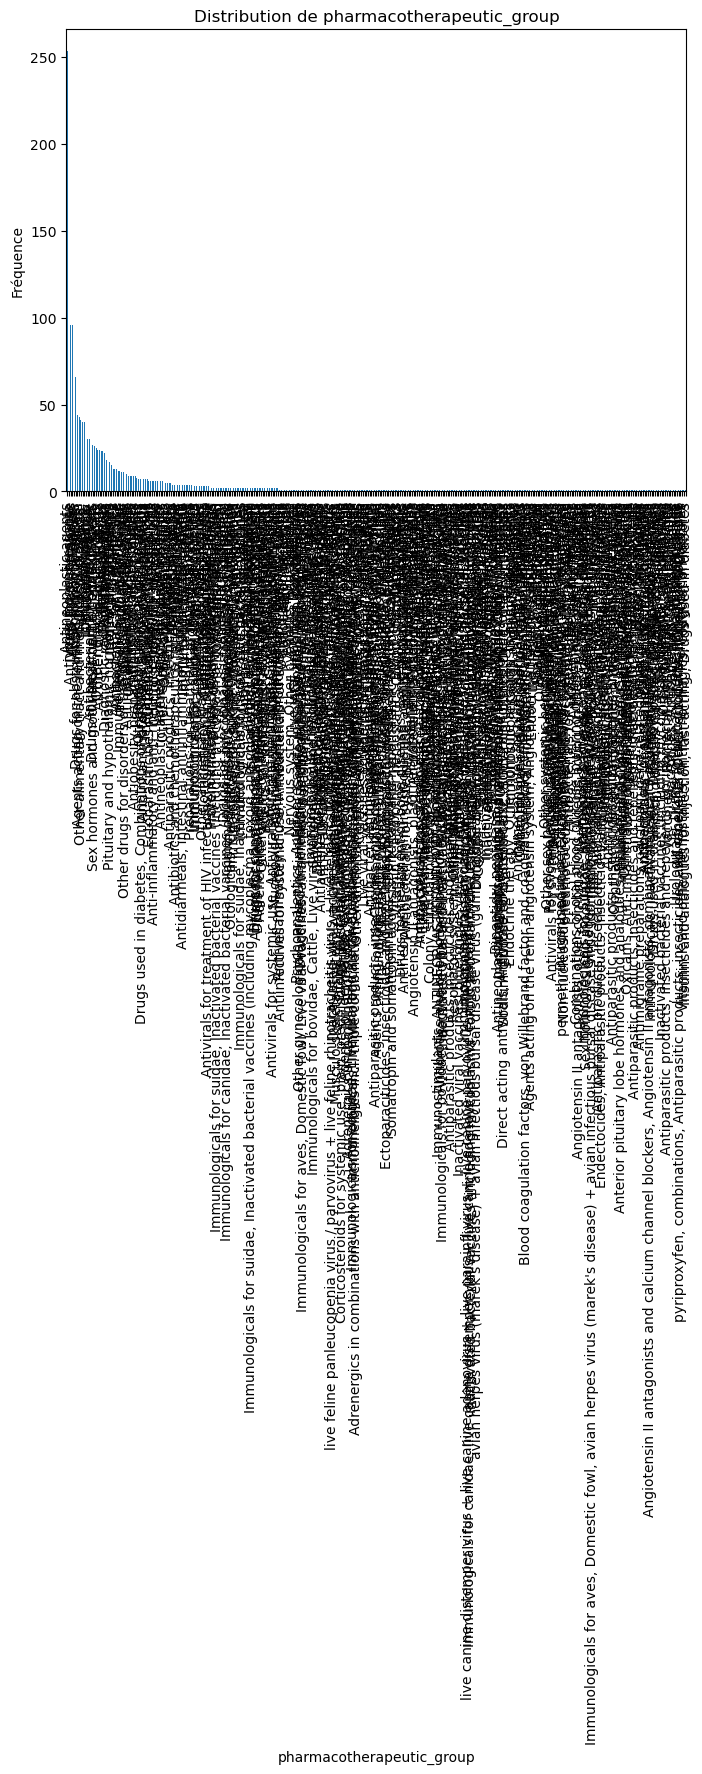

In [46]:
for col in new_datas.columns:
    if new_datas[col].dtype == 'object' and col!='authorisation_status':
        plt.figure(figsize=(8, 6))
        new_datas[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution de {col}')
        plt.xlabel(col)
        plt.ylabel('Fréquence')
        plt.show()


In [15]:
type(datas.columns)

pandas.core.indexes.base.Index

In [30]:
new_datas

category medicine_name  \
0       human      Adcetris   
1       human         Nityr   
2       human       Ebvallo   
3       human     Ronapreve   
4       human      Cosentyx   
...       ...           ...   
1983    human      Liprolog   
1984    human       EchoGen   
1985    human     Ecokinase   
1986    human      Primavax   
1987    human   Pylori-Chek   

                                       therapeutic_area  \
0               Lymphoma, Non-Hodgkin;  Hodgkin Disease   
1                                          Tyrosinemias   
2                         Lymphoproliferative Disorders   
3                              COVID-19 virus infection   
4     Arthritis, Psoriatic;  Psoriasis;  Spondylitis...   
...                                                 ...   
1983                                  Diabetes Mellitus   
1984                                   Echocardiography   
1985                              Myocardial Infarction   
1986  Hepatitis B;  Tetanus;  Immunization;  Diphtheria   
1987             Breath Tests;  Helicobacter Infections   

                                            common_name  \
0                                   brentuximab vedotin   
1                                            nitisinone   
2                                         tabelecleucel   
3                                casirivimab, imdevimab   
4                                           secukinumab   
...                                                 ...   
1983                                     insulin lispro   
1984                                dodecafluoropentane   
1985                                          reteplase   
1986  diphtheria, tetanus and hepatitis b (rdna) vac...   
1987                                           13c-urea   

                                       active_substance  patient_safety  \
0                                   brentuximab vedotin           False   
1                                            nitisinone           False   
2                                         tabelecleucel           False   
3                                casirivimab, imdevimab           False   
4                                           secukinumab           False   
...                                                 ...             ...   
1983                                     insulin lispro           False   
1984                                dodecafluoropentane           False   
1985                                          reteplase           False   
1986  diphtheria toxoid, hepatitis b, recombinant su...           False   
1987                                         urea (13c)           False   

     authorisation_status  additional_monitoring  generic  biosimilar  \
0              authorised                  False    False       False   
1              authorised                  False     True       False   
2              authorised                   True    False       False   
3              authorised                   True    False       False   
4              authorised                  False    False       False   
...                   ...                    ...      ...         ...   
1983            withdrawn                  False    False       False   
1984            withdrawn                  False    False       False   
1985            withdrawn                  False    False       False   
1986            withdrawn                  False    False       False   
1987            withdrawn                  False    False       False   

      conditional_approval  exceptional_circumstances  accelerated_assessment  \
0                    False                      False                   False   
1                    False                      False                   False   
2                    False                       True                   False   
3                    False                      False                   False   
4                    False     

In [20]:
for col in datas.columns:
    if datas[col].dtype == 'object':  # Vérifiez si la colonne est catégorielle
        summary = datas[col].value_counts()
        print(f"Résumé de {col} :")
        print(summary)

Résumé de category :
category
human         1706
veterinary     282
Name: count, dtype: int64
Résumé de medicine_name :
medicine_name
Xeljanz                                                                                               2
Eladynos                                                                                              2
Valdoxan                                                                                              2
Yondelis                                                                                              2
Veraflox                                                                                              2
                                                                                                     ..
Pandemic influenza vaccine H5N1 AstraZeneca (previously Pandemic influenza vaccine H5N1 Medimmune)    1
Cinryze                                                                                               1
Silodyx                           

In [ ]:
contingency_table = pd.crosstab(df['Variable1'], df['Variable2'])